### **Bài thực hành 3: Hugging Face**
* **Tên sinh viên:** Huỳnh Thế Hy
* **Mã số sinh viên:** 051205009083
---
### **Exercise 1: Sentiment Analysis với Hugging Face**
#### Em sẽ sử dụng thư viện `transformers` của Hugging Face để thực hiện tác vụ phân tích tình cảm. Mục tiêu là sử dụng một mô hình đã được huấn luyện trước (pre-trained model) từ Hugging Face Hub để phân loại sắc thái của một câu văn bản là tích cực (POSITIVE) hay tiêu cực (NEGATIVE).
#### **Bước 1: Sử dụng một mô hình phân tích tình cảm đã được huấn luyện trước**
Hugging Face đã cung cấp một chức năng `pipeline` mạnh mẽ. Bao gồm tất cả các bước cần thiết từ tiền xử lý văn bản, đưa dữ liệu vào mô hình, và xử lý kết quả đầu ra.
Em sẽ sử dụng mô hình `distilbert-base-uncased-finetuned-sst-2-english`, một mô hình phổ biến và hiệu quả cho tác vụ phân tích tình cảm trên văn bản tiếng Anh.

In [1]:
# Import pipeline từ thư viện transformers
from transformers import pipeline

# Tải pipeline cho tác vụ "sentiment-analysis"
# Chức năng này sẽ tự động tải về mô hình và tokenizer tương ứng
print("Đang tải mô hình phân tích tình cảm...")
sentiment_pipeline = pipeline("sentiment-analysis")
print("Tải mô hình thành công!")

c:\Users\VTPT\Downloads\CODE\Pratice-Deep_learning\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Đang tải mô hình phân tích tình cảm...


Device set to use cpu


Tải mô hình thành công!


#### **Bước 2 & 3: Tokenize và phân tích tình cảm trên câu mẫu**
Chức năng `pipeline` sẽ tự động thực hiện việc **tokenize** (tách câu thành các token mà mô hình có thể hiểu) và sau đó **thực hiện phân tích**. Em sẽ thử nghiệm với hai câu mẫu: một câu có sắc thái tích cực và một câu có sắc thái tiêu cực.

In [2]:
# Các câu mẫu để phân tích
positive_sentence = "I absolutely love this course, it is so insightful and well-structured!"
negative_sentence = "The plot of the movie was predictable and the acting was rather disappointing."

# Thực hiện phân tích trên các câu mẫu
results = sentiment_pipeline([positive_sentence, negative_sentence])

# In kết quả
for sentence, result in zip([positive_sentence, negative_sentence], results):
    print(f"Câu: '{sentence}'")
    print(f"  -> Nhãn dự đoán: {result['label']}, với độ tin cậy: {result['score']:.4f}\n")

Câu: 'I absolutely love this course, it is so insightful and well-structured!'
  -> Nhãn dự đoán: POSITIVE, với độ tin cậy: 0.9999

Câu: 'The plot of the movie was predictable and the acting was rather disappointing.'
  -> Nhãn dự đoán: NEGATIVE, với độ tin cậy: 0.9998



**4.1. Báo cáo kết quả**

Dựa trên kết quả từ đoạn mã trên:
1.  Đối với câu `"I absolutely love this course, it is so insightful and well-structured!"`:
    *   Mô hình đã dự đoán nhãn là **POSITIVE**.
    *   Độ tin cậy của dự đoán rất cao, cho thấy mô hình rất chắc chắn rằng đây là một câu mang sắc thái tích cực.

2.  Đối với câu `"The plot of the movie was predictable and the acting was rather disappointing."`:
    *   Mô hình đã dự đoán nhãn là **NEGATIVE**.
    *   Tương tự, độ tin cậy cũng ở mức cao, khẳng định rằng câu này mang sắc thái tiêu cực.

**Kết luận:** Mô hình pre-trained từ Hugging Face Hub hoạt động rất hiệu quả trong việc xác định chính xác sắc thái của các câu văn bản tiếng Anh mà không cần bất kỳ bước huấn luyện hay tinh chỉnh nào từ phía người dùng.

**4.2. Trực quan hóa**

Biểu đồ cột để so sánh độ tin cậy của các dự đoán.

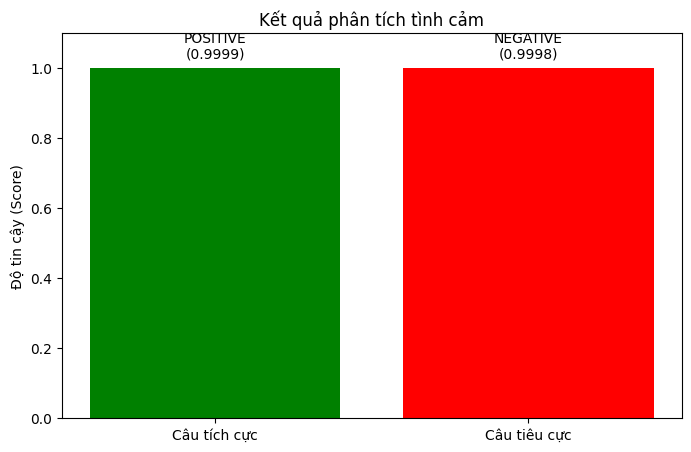

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Chuẩn bị dữ liệu để vẽ đồ thị
sentences = ["Câu tích cực", "Câu tiêu cực"]
labels = [r['label'] for r in results]
scores = [r['score'] for r in results]

# Tạo DataFrame để dễ dàng trực quan hóa
df = pd.DataFrame({
    'Loại câu': sentences,
    'Nhãn dự đoán': labels,
    'Độ tin cậy': scores
})

# Vẽ biểu đồ
colors = ['green' if label == 'POSITIVE' else 'red' for label in df['Nhãn dự đoán']]
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(df['Loại câu'], df['Độ tin cậy'], color=colors)

# Thêm các chi tiết cho đồ thị
ax.set_ylabel('Độ tin cậy (Score)')
ax.set_title('Kết quả phân tích tình cảm')
ax.set_ylim(0, 1.1)

# Hiển thị nhãn và điểm số trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    label = df['Nhãn dự đoán'][bars.index(bar)]
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{label}\n({yval:.4f})", ha='center', va='bottom')

plt.show()

**Phân tích biểu đồ:**
Biểu đồ cột trực quan hóa rõ ràng kết quả phân tích. Cột "Câu tích cực" (màu xanh lá) đạt mức độ tin cậy rất cao cho nhãn POSITIVE, và tương tự, cột "Câu tiêu cực" (màu đỏ) cũng cho thấy sự chắc chắn của mô hình khi gán nhãn NEGATIVE. Điều này minh chứng cho khả năng phân loại tốt của mô hình đã chọn.
